# Flight Delay Prediction

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read
files = ["05-2019.csv", "06-2019.csv"]

# Dataframe
dataframes = []
for file in files:
    df1 = pd.read_csv(file)
    dataframes.append(df1)

df = pd.concat(dataframes, ignore_index=True)

In [3]:
df

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,tail_number,departure_delay,arrival_delay,delay_carrier,...,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
0,AS,121,SEA,ANC,2019-05-01,215,N615AS,-8,-16,0,...,0.0,29.59,10.0,8.0,7.027253e+10,42.0,0.0,30.16,10.0,3.0
1,F9,402,LAX,DEN,2019-05-01,147,N701FR,17,-4,0,...,0.0,29.65,10.0,3.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0
2,F9,662,SFO,DEN,2019-05-01,158,N346FR,44,27,0,...,0.0,29.98,10.0,6.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0
3,F9,790,PDX,DEN,2019-05-01,156,N332FR,24,10,0,...,0.0,29.98,10.0,0.0,7.256500e+10,34.0,0.0,24.43,4.0,0.0
4,AS,108,ANC,SEA,2019-05-01,210,N548AS,-9,-31,0,...,0.0,30.18,10.0,5.0,7.279302e+10,44.0,0.0,29.58,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388829,DL,7388,SLC,EKO,2019-06-30,57,N427SW,-4,-4,0,...,0.0,25.74,10.0,10.0,7.258252e+10,75.0,0.0,24.88,10.0,0.0
1388830,DL,1129,ATL,BHM,2019-06-30,54,N955DL,-5,-14,0,...,0.0,28.91,10.0,10.0,7.222801e+10,85.0,0.0,29.37,10.0,5.0
1388831,DL,3526,ATL,MGM,2019-06-30,58,N449SW,75,60,44,...,0.0,28.95,10.0,8.0,7.222601e+10,80.0,0.0,29.80,10.0,3.0
1388832,DL,2383,ATL,BHM,2019-06-30,55,N904DL,-7,-17,0,...,0.0,28.97,10.0,7.0,7.222801e+10,81.0,0.0,29.37,10.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388834 entries, 0 to 1388833
Data columns (total 35 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   carrier_code                    1388834 non-null  object 
 1   flight_number                   1388834 non-null  int64  
 2   origin_airport                  1388834 non-null  object 
 3   destination_airport             1388834 non-null  object 
 4   date                            1388834 non-null  object 
 5   scheduled_elapsed_time          1388834 non-null  int64  
 6   tail_number                     1384825 non-null  object 
 7   departure_delay                 1388834 non-null  int64  
 8   arrival_delay                   1388834 non-null  int64  
 9   delay_carrier                   1388834 non-null  int64  
 10  delay_weather                   1388834 non-null  int64  
 11  delay_national_aviation_system  1388834 non-null  int64  
 12  

In [5]:
drop_column = [4,5,14,15,16,17,18,19,20,21,22,23,29]

df.drop(df.columns[drop_column], axis=1, inplace=True)

In [6]:
df

,carrier_code,flight_number,origin_airport,destination_airport,tail_number,departure_delay,arrival_delay,delay_carrier,delay_weather,delay_national_aviation_system,...,HourlyDryBulbTemperature_x,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
0,AS,121,SEA,ANC,N615AS,-8,-16,0,0,0,...,49.0,0.0,29.59,10.0,8.0,42.0,0.0,30.16,10.0,3.0
1,F9,402,LAX,DEN,N701FR,17,-4,0,0,0,...,58.0,0.0,29.65,10.0,3.0,34.0,0.0,24.43,4.0,0.0
2,F9,662,SFO,DEN,N346FR,44,27,0,0,0,...,51.0,0.0,29.98,10.0,6.0,34.0,0.0,24.43,4.0,0.0
3,F9,790,PDX,DEN,N332FR,24,10,0,0,0,...,48.0,0.0,29.98,10.0,0.0,34.0,0.0,24.43,4.0,0.0
4,AS,108,ANC,SEA,N548AS,-9,-31,0,0,0,...,43.0,0.0,30.18,10.0,5.0,44.0,0.0,29.58,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388829,DL,7388,SLC,EKO,N427SW,-4,-4,0,0,0,...,74.0,0.0,25.74,10.0,10.0,75.0,0.0,24.88,10.0,0.0
1388830,DL,1129,ATL,BHM,N955DL,-5,-14,0,0,0,...,81.0,0.0,28.91,10.0,10.0,85.0,0.0,29.37,10.0,5.0
1388831,DL,3526,ATL,MGM,N449SW,75,60,44,0,0,...,79.0,0.0,28.95,10.0,8.0,80.0,0.0,29.80,10.0,3.0
1388832,DL,2383,ATL,BHM,N904DL,-7,-17,0,0,0,...,77.0,0.0,28.97,10.0,7.0,81.0,0.0,29.37,10.0,0.0


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["carrier_code"] = le.fit_transform(df["carrier_code"])
df["origin_airport"] = le.fit_transform(df["origin_airport"])
df["destination_airport"] = le.fit_transform(df["destination_airport"])
df["tail_number"] = le.fit_transform(df["tail_number"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388834 entries, 0 to 1388833
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   carrier_code                    1388834 non-null  int32  
 1   flight_number                   1388834 non-null  int64  
 2   origin_airport                  1388834 non-null  int32  
 3   destination_airport             1388834 non-null  int32  
 4   tail_number                     1388834 non-null  int32  
 5   departure_delay                 1388834 non-null  int64  
 6   arrival_delay                   1388834 non-null  int64  
 7   delay_carrier                   1388834 non-null  int64  
 8   delay_weather                   1388834 non-null  int64  
 9   delay_national_aviation_system  1388834 non-null  int64  
 10  delay_security                  1388834 non-null  int64  
 11  delay_late_aircarft_arrival     1388834 non-null  int64  
 12  

<Axes: >

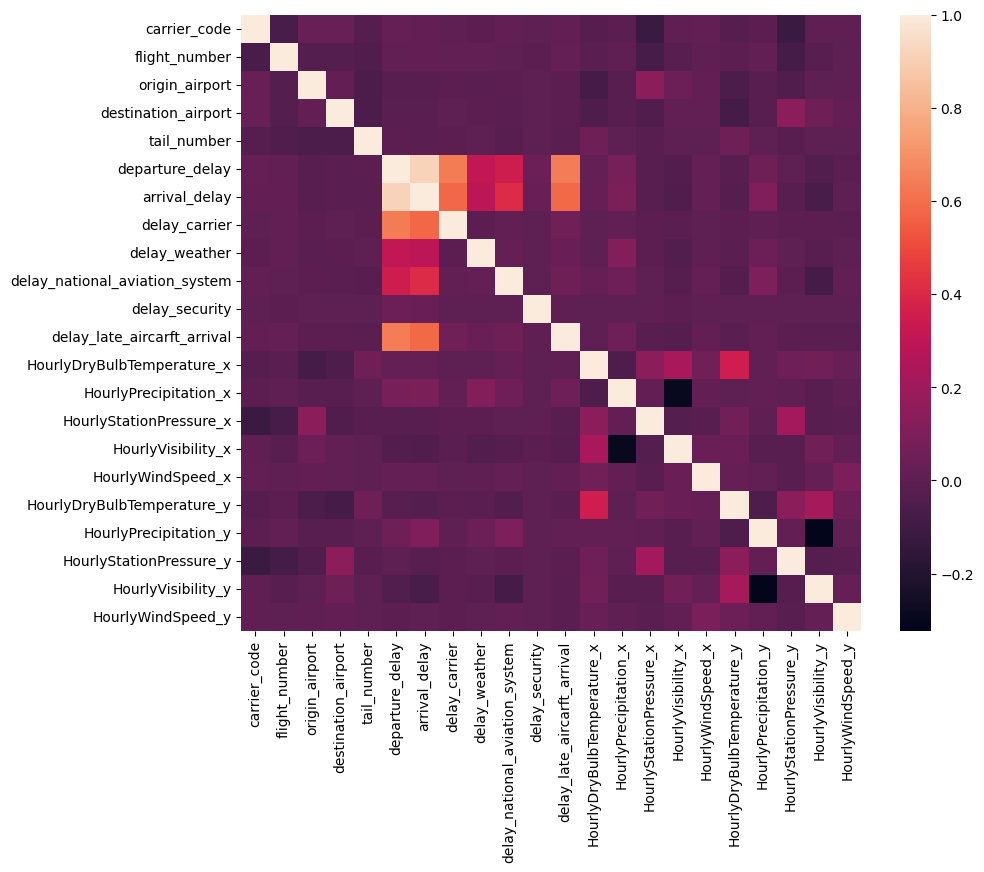

In [9]:
# Heat map
plt.figure(figsize=(10, 8))
cor = df.corr()
sbn.heatmap(cor)

In [10]:
# Number of missing values in the columns
df.isna().sum()

carrier_code                         0
flight_number                        0
origin_airport                       0
destination_airport                  0
tail_number                          0
departure_delay                      0
arrival_delay                        0
delay_carrier                        0
delay_weather                        0
delay_national_aviation_system       0
delay_security                       0
delay_late_aircarft_arrival          0
HourlyDryBulbTemperature_x         552
HourlyPrecipitation_x             2704
HourlyStationPressure_x            552
HourlyVisibility_x                 552
HourlyWindSpeed_x                  552
HourlyDryBulbTemperature_y         554
HourlyPrecipitation_y             2707
HourlyStationPressure_y            554
HourlyVisibility_y                 554
HourlyWindSpeed_y                  554
dtype: int64

In [11]:
# Delete all rows with missing values
df = df.dropna(subset=['HourlyDryBulbTemperature_x','HourlyPrecipitation_x','HourlyStationPressure_x',
                       'HourlyVisibility_x','HourlyWindSpeed_x','HourlyDryBulbTemperature_y',
                       'HourlyPrecipitation_y','HourlyStationPressure_y',
                       'HourlyVisibility_y','HourlyWindSpeed_y',])

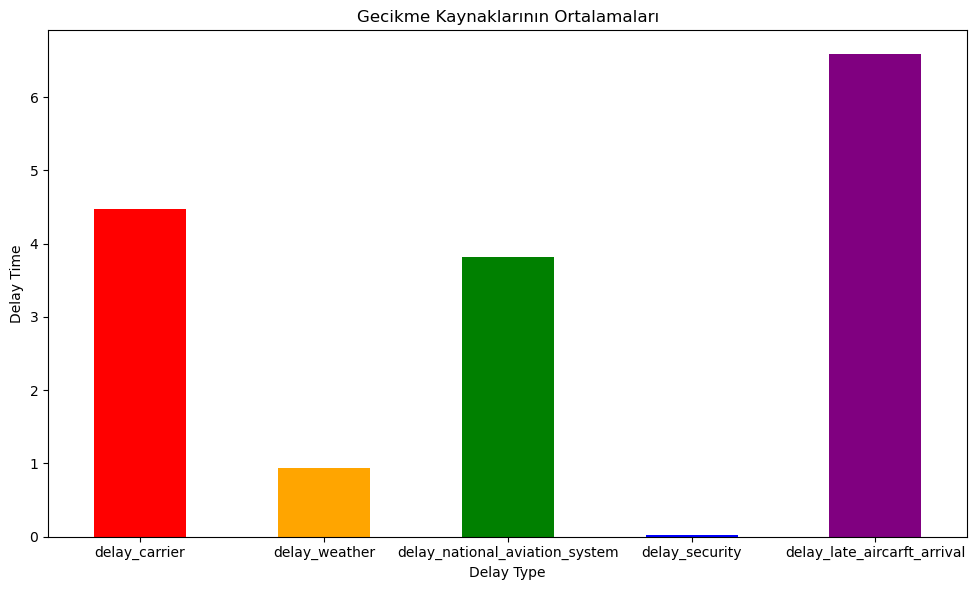

In [12]:
# Average of delays
delays = df[['delay_carrier', 'delay_weather', 'delay_national_aviation_system', 'delay_security', 'delay_late_aircarft_arrival']].mean()

plt.figure(figsize=(10, 6))
delays.plot(kind='bar', color=['red', 'orange', 'green', 'blue', 'purple'])
plt.title('Gecikme Kaynaklarının Ortalamaları')
plt.xlabel('Delay Type')
plt.ylabel('Delay Time')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
# Features and target variable
X = df.drop('departure_delay', axis=1)
y = df['departure_delay']

In [14]:
y

0          -8
1          17
2          44
3          24
4          -9
           ..
1388829    -4
1388830    -5
1388831    75
1388832    -7
1388833    -8
Name: departure_delay, Length: 1383423, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
# Splitting training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
dataframe = pd.DataFrame({"Predicted Value": y_pred, "Real Value": y_test})
dataframe

,Predicted Value,Real Value
260902,-1.601236,-2
1040293,-1.557829,5
146844,55.738863,61
1353381,63.072774,58
1025531,-6.996904,-9
...,...,...
800085,-0.338065,-1
834050,-0.611655,11
1374965,37.485425,40
44170,32.990879,54


In [20]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 6.752058172526791
MSE: 148.17737328368958
R2: 0.944551506483487


In [21]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
y_pred1 = rf.predict(X_test)

In [23]:
dataframe1 = pd.DataFrame({"Predicted Value": y_pred1, "Real Value": y_test})
dataframe1

,Predicted Value,Real Value
260902,-0.52,-2
1040293,1.37,5
146844,64.01,61
1353381,58.19,58
1025531,-4.66,-9
...,...,...
800085,0.47,-1
834050,-1.03,11
1374965,46.66,40
44170,41.54,54


In [24]:
mae = mean_absolute_error(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
r2 =r2_score(y_test,y_pred1)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 5.126218125567732
MSE: 95.53274481732512
R2: 0.9642513113559071


In [25]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [26]:
y_pred2 = gbr.predict(X_test)

In [27]:
dataframe2 = pd.DataFrame({"Predicted Value": y_pred2, "Real Value": y_test})
dataframe2

,Predicted Value,Real Value
260902,-2.624966,-2
1040293,-1.674619,5
146844,65.335154,61
1353381,59.173308,58
1025531,-4.642922,-9
...,...,...
800085,-1.348745,-1
834050,-1.710899,11
1374965,45.566739,40
44170,37.794446,54


In [28]:
mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred2)
r2 =r2_score(y_test,y_pred2)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 6.126268507603614
MSE: 148.98758463675705
R2: 0.9442483225495164
